In [1]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook  # 1) Data handling
np.random.seed(777)

#configure jupyter notebook to make matplotlib as high resulation
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#importing data from excel
from openpyxl.utils import get_column_letter    # 3) Turn col number -> Excel letter
pd.set_option('display.width',200)

In [3]:
data = pd.read_excel(r"Portfolio_Optimization.xlsx",sheet_name = "daily_Price",usecols ="A:J")


In [4]:
print(data)

          Date  Brac  ENBK  PRBK   TISM   SQPH    MARI   RNTL   BXPH  BSRM
0   2025-08-17  69.0  25.6  28.1  305.2  225.4  2905.1  496.0  120.1  65.0
1   2025-08-14  68.7  25.3  27.7  308.0  224.9  2897.3  494.3  115.4  64.8
2   2025-08-13  68.5  25.2  27.4  308.9  225.3  2885.9  490.3  112.5  65.5
3   2025-08-12  68.8  25.3  27.4  307.0  226.0  2856.3  492.5  110.5  64.1
4   2025-08-11  68.3  25.5  27.5  308.0  224.2  2850.1  494.4  113.5  64.6
..         ...   ...   ...   ...    ...    ...     ...    ...    ...   ...
957        NaT   NaN   NaN   NaN    NaN    NaN     NaN    NaN    NaN   NaN
958        NaT   NaN   NaN   NaN    NaN    NaN     NaN    NaN    NaN   NaN
959        NaT   NaN   NaN   NaN    NaN    NaN     NaN    NaN    NaN   NaN
960        NaT   NaN   NaN   NaN    NaN    NaN     NaN    NaN    NaN   NaN
961        NaT   NaN   NaN   NaN    NaN    NaN     NaN    NaN    NaN   NaN

[962 rows x 10 columns]


In [5]:
close = data.set_index(data.columns[0]).sort_index()#Set the first column (Date) as index
close = close.dropna()
print(close.head())

             Brac   ENBK  PRBK   TISM   SQPH    MARI     RNTL   BXPH  BSRM
Date                                                                      
2021-08-19  41.54  28.84  22.7  255.0  227.0  2329.9  1196.94  191.2  65.8
2021-08-22  41.54  28.84  22.7  255.0  229.2  2329.9  1196.94  191.2  65.8
2021-08-23  42.14  29.55  22.7  255.0  229.3  2329.9  1196.94  191.2  65.8
2021-08-24  41.88  29.47  22.9  255.0  230.0  2329.9  1196.94  191.2  65.8
2021-08-25  41.54  29.71  23.5  255.0  229.3  2329.9  1196.94  191.2  65.8


In [6]:
stocks = ['Brac','ENBK','PRBK','TISM','SQPH','MARI','RNTL','BXPH','BSRM']

In [7]:
#analysing log return 
log_returns = np.log(close / close.shift(1))


In [8]:
#drop any missing values
log_returns = log_returns.dropna()
print(round(log_returns,3))

             Brac   ENBK   PRBK   TISM   SQPH   MARI   RNTL   BXPH   BSRM
Date                                                                     
2021-08-22  0.000  0.000  0.000  0.000  0.010  0.000  0.000  0.000  0.000
2021-08-23  0.014  0.024  0.000  0.000  0.000  0.000  0.000  0.000  0.000
2021-08-24 -0.006 -0.003  0.009  0.000  0.003  0.000  0.000  0.000  0.000
2021-08-25 -0.008  0.008  0.026  0.000 -0.003  0.000  0.000  0.000  0.000
2021-08-26 -0.002  0.005 -0.004  0.000  0.000  0.000  0.000  0.000  0.000
...           ...    ...    ...    ...    ...    ...    ...    ...    ...
2025-08-11  0.019  0.000  0.000 -0.004 -0.006 -0.009 -0.001  0.007 -0.012
2025-08-12  0.007 -0.008 -0.004 -0.003  0.008  0.002 -0.004 -0.027 -0.008
2025-08-13 -0.004 -0.004  0.000  0.006 -0.003  0.010 -0.004  0.018  0.022
2025-08-14  0.003  0.004  0.011 -0.003 -0.002  0.004  0.008  0.025 -0.011
2025-08-17  0.004  0.012  0.014 -0.009  0.002  0.003  0.003  0.040  0.003

[956 rows x 9 columns]


In [9]:
cov_matrix=log_returns.cov()*240
print(round(cov_matrix,6))

          Brac      ENBK      PRBK      TISM      SQPH      MARI      RNTL      BXPH      BSRM
Brac  0.055074  0.008430  0.008792  0.009368  0.006013  0.001428  0.002901  0.001288  0.005583
ENBK  0.008430  0.031193  0.005148  0.004321  0.002631  0.000361  0.001059  0.004386  0.005074
PRBK  0.008792  0.005148  0.043387  0.007472  0.004160  0.000635  0.003057  0.005238  0.007076
TISM  0.009368  0.004321  0.007472  0.046313  0.004652  0.002171  0.003291  0.007641  0.010759
SQPH  0.006013  0.002631  0.004160  0.004652  0.012280  0.000860  0.001740  0.002254  0.005080
MARI  0.001428  0.000361  0.000635  0.002171  0.000860  0.012990  0.000507  0.001741  0.001007
RNTL  0.002901  0.001059  0.003057  0.003291  0.001740  0.000507  0.025682  0.001549  0.005438
BXPH  0.001288  0.004386  0.005238  0.007641  0.002254  0.001741  0.001549  0.081014  0.007991
BSRM  0.005583  0.005074  0.007076  0.010759  0.005080  0.001007  0.005438  0.007991  0.045949


In [10]:
def standard_deviation(weights,cov_matrix):
    variance = (weights.T @ cov_matrix @ weights)
    return np.sqrt(variance *240)

In [11]:
def expected_return():
    return np.sum(log_returns.mean() *weights *240)

In [12]:
def sharp_ratio(weights, log_returns, cov_matrix, riskfree_rate):
    riskfree_rate = .10
    expected_return = np.sum(log_returns.mean() *weights *240)
    standard_deviation = np.sqrt(weights.T @ cov_matrix @ weights)
    return(expected_return-riskfree_rate / standard_deviation)

In [13]:
riskfree_rate = .10

In [14]:
#define negative sharp raio
def neg_sharp_ratio(weights,log_returns,cov_matrix,riskfree_rate):
    return -sharp_ratio(weights,log_returns,cov_matrix,riskfree_rate)
    

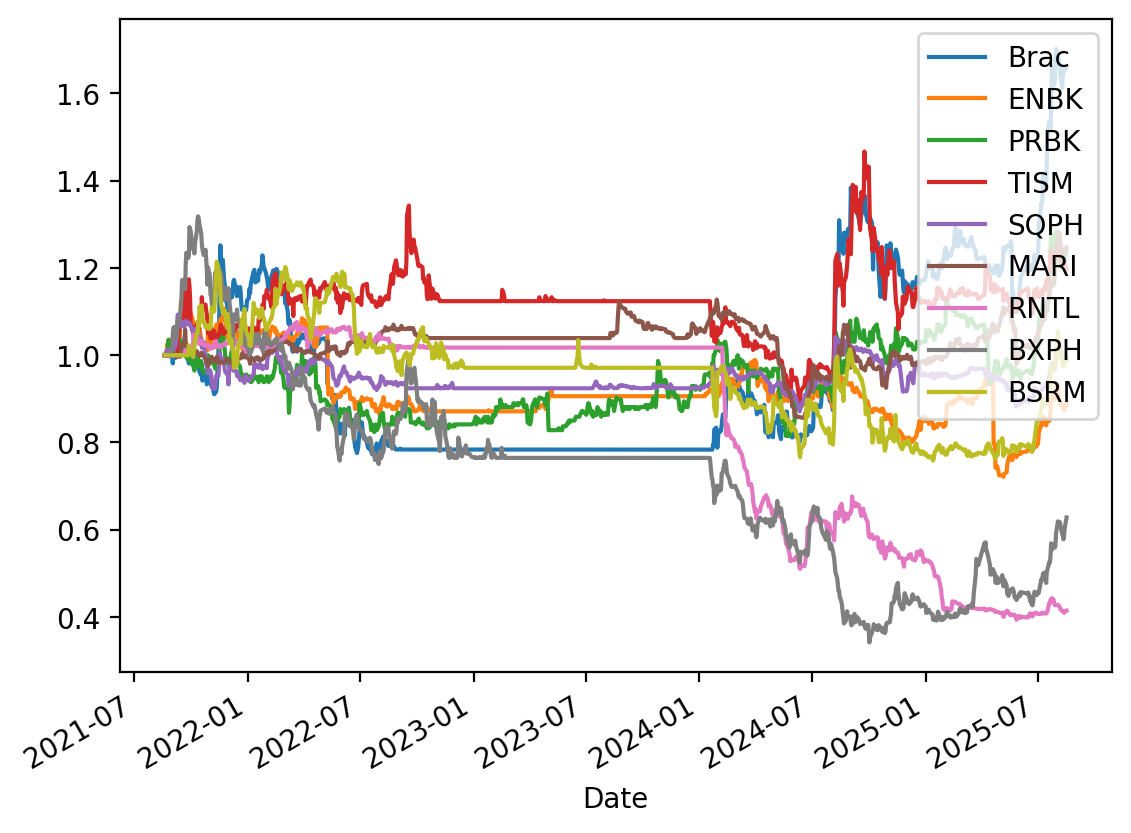

In [15]:
stock_normed = close/close.iloc[0]
save = stock_normed.plot()
fig =save.get_figure()

fig.savefig("relative_g.png",dpi=300)

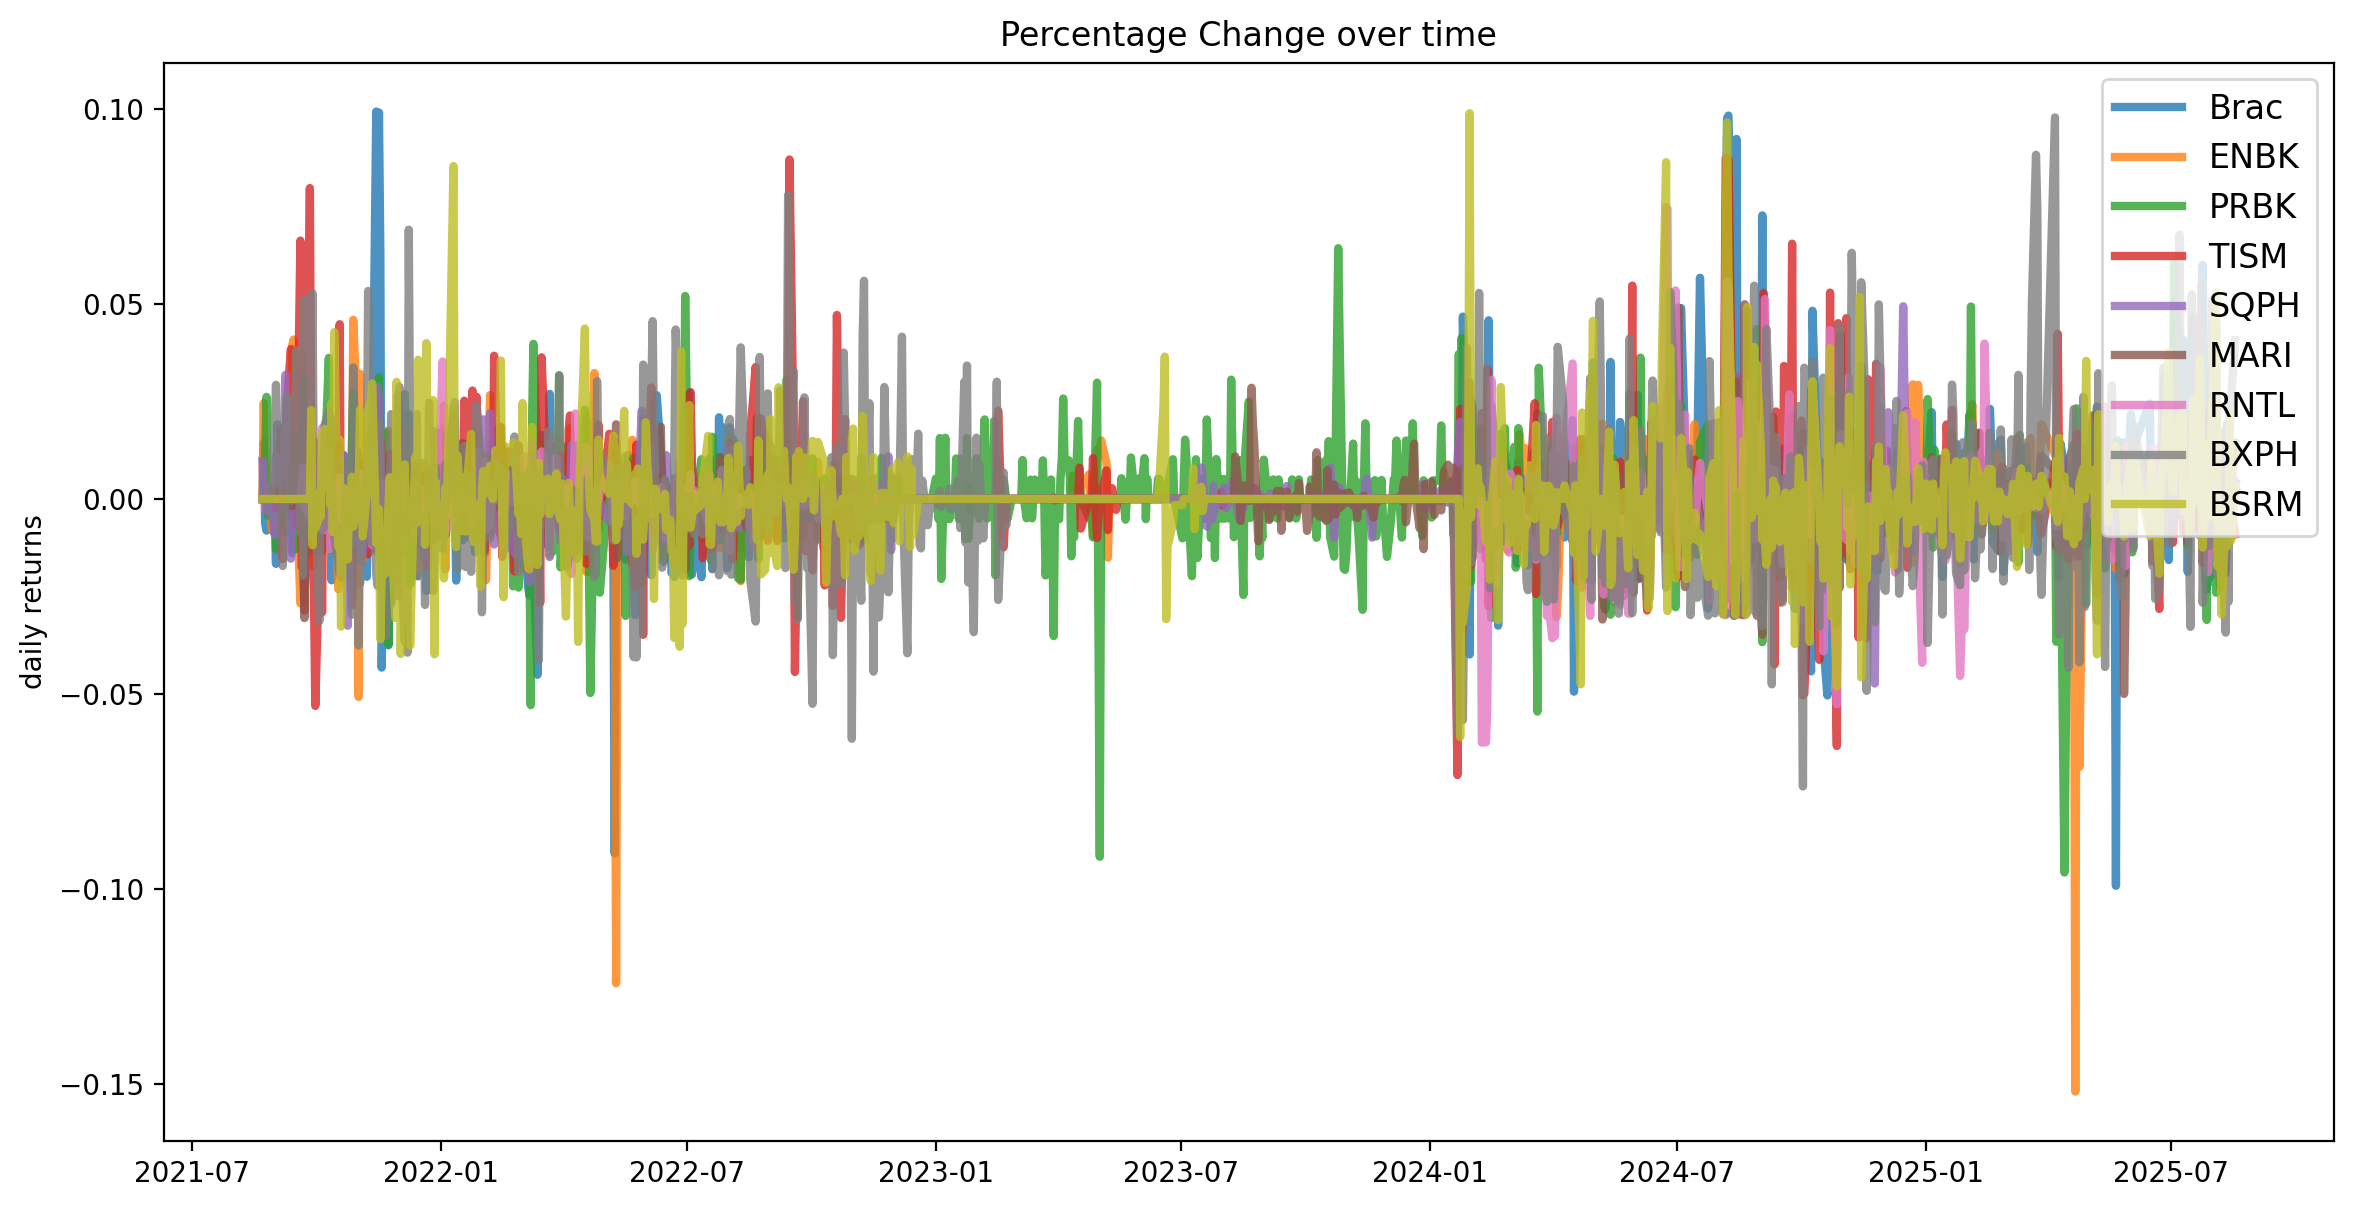

In [16]:
pcreturns = close.pct_change(fill_method=None)
plt.figure(figsize=(14,7))
for c in pcreturns.columns.values:
    plt.plot(pcreturns.index, pcreturns[c], lw=3, alpha=.8, label=c)
plt.legend(loc ='upper right', fontsize =12)
plt.ylabel('daily returns')
plt.title('Percentage Change over time')
plt.savefig('daily returns.png')

In [17]:
stocks =['Brac','ENBK','PRBK','TISM','SQPH','MARI','RNTL','BXPH','BSRM']
constraints = {'type':'eq','fun': lambda weights : np.sum(weights)-1.0}
bounds = [(0,0.4) for _ in range(len(stocks))]
bounds = [(0.05, 0.4) for _ in range(len(stocks))]

In [18]:
initial_weights = np.array([1/len(stocks)]* len(stocks))
print(initial_weights)

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


In [19]:
optimized_results = minimize(neg_sharp_ratio, initial_weights, args=(log_returns, cov_matrix, riskfree_rate), method = 'SLSQP', constraints=constraints, bounds=bounds)

In [20]:
#get the optimal weights
optimal_weights = optimized_results.x
print(optimal_weights)

[0.4  0.05 0.05 0.05 0.05 0.05 0.05 0.25 0.05]


In [21]:
print('optimal weights')
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight:.2f}")

print()

optimal_portfolio_return = np.sum(log_returns.mean() *optimal_weights *240)
optimal_portfolio_volatility = np.sqrt(optimal_weights.T @ cov_matrix @ optimal_weights)
optimal_sharp_ratio = sharp_ratio(optimal_weights,log_returns,cov_matrix,riskfree_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Expected Sharp Ratio: {optimal_sharp_ratio:.4f}")

optimal weights
Brac: 0.40
ENBK: 0.05
PRBK: 0.05
TISM: 0.05
SQPH: 0.05
MARI: 0.05
RNTL: 0.05
BXPH: 0.25
BSRM: 0.05

Expected Annual Return: 0.0167
Expected Volatility: 0.1324
Expected Sharp Ratio: -0.7386


In [22]:
def portfolio_annulized_performance(weights,mean_logReturns,cov_matrix):
    expected_returns = np.sum(mean_logReturns*weights *240)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(240)
    return expected_returns, std


In [23]:
def random_portfolios(n_portfolios, mean_logReturns, cov_matrix,riskfree_rate):
    results = np.zeros((3, n_portfolios))
    weights_record = []
    for i in range(n_portfolios):
        weights = np.random.random(9)
        weights /=np.sum(weights)
        weights_record.append(weights)
        port_return, port_vol = portfolio_annulized_performance(weights,mean_logReturns,cov_matrix)
        results[0,i] = port_vol
        results[1,i] = port_return
        results[2,i] = (port_return - riskfree_rate) / port_vol
    return results, weights_record

In [24]:
#input for the varriable above
log_returns = round(np.log(close / close.shift(1)),3)
log_returns = log_returns.dropna()
mean_logReturns = log_returns.mean()
cov_matrix= log_returns.cov()
n_portfolios = 30000
riskfree_rate = 0.06
print()

In [34]:
def display_simulated_ef_with_random(n_portfolios, mean_logReturns, cov_matrix,riskfree_rate):
    results, weights = random_portfolios(n_portfolios, mean_logReturns, cov_matrix,riskfree_rate)

    max_sharp_idx = np.argmax(results[2])
    msr_vol, msr_return = results[0,max_sharp_idx], results[1,max_sharp_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharp_idx], index=close.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    GMV_vol, GMV_ret = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],  index=close.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T


    print('-'*80)
    print('Maximum Sharpe Ratio Portfolio Allocation: \n' )
    print('Return:',round(msr_return,3))
    print('Volatility:', round(msr_vol,3))
    print('\n')
    print(max_sharpe_allocation)

    print('-'*80)
    print('Minimum Volatility Portfolio Allocation: \n' )
    print('Return:',round(GMV_ret,3))
    print('Volatility:', round(GMV_vol,3))
    print('\n')
    print(min_vol_allocation)

    plt.figure(figsize=(6,4))
    plt.scatter(results[0,:],  results[1,:], c=results[2,:], cmap='plasma', marker ='o', s=10, alpha =.5)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(msr_vol, msr_return, marker='*', color='r', s=300, label = 'Max Sharpe Ratio')
    plt.scatter(GMV_vol, GMV_ret, marker='*', color='g', s=300, label = 'Minimum Volatility')
    plt.title('Simulated Portfolio Optimizatio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend(labelspacing = 0.8)
    plt.savefig('my.jpg', dpi =300)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation: 

Return: 0.06
Volatility: 0.104


             Brac  ENBK   PRBK  TISM  SQPH  MARI  RNTL  BXPH  BSRM
allocation  24.38  1.74  24.95  8.65  9.09  25.2  0.48  0.97  4.54
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation: 

Return: 0.002
Volatility: 0.073


            Brac   ENBK  PRBK  TISM   SQPH   MARI  RNTL  BXPH  BSRM
allocation  0.19  12.57  8.73  5.55  29.49  28.39  5.02  5.43  4.62


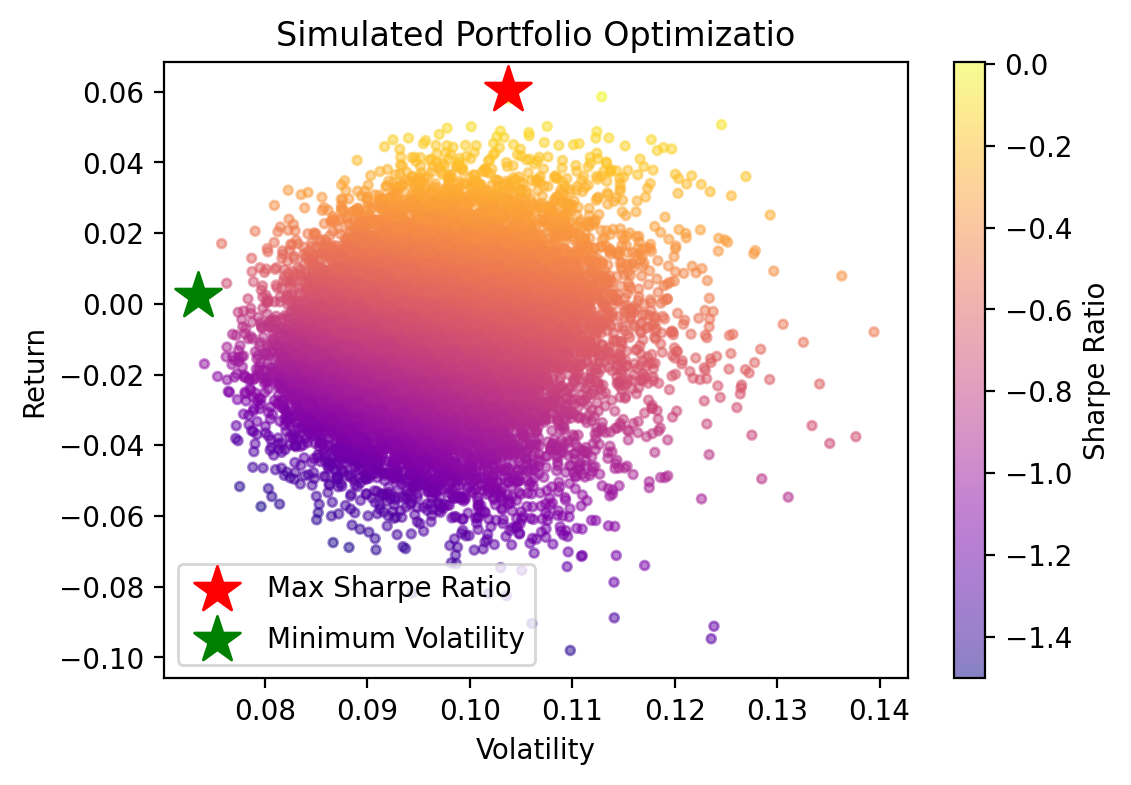

In [35]:
display_simulated_ef_with_random(n_portfolios, mean_logReturns, cov_matrix,riskfree_rate)

In [27]:
n_assets = len(stocks)
n_portfolios = 15000

In [28]:
ret_array = np.zeros(n_portfolios)
vol_array = np.zeros(n_portfolios)
sharp_array = np.zeros(n_portfolios)
weights_record = []

In [29]:
for i in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /=np.sum(weights)
    weights_record.append(weights)

    port_return = np.sum(log_returns.mean() *weights *240)
    ret_array[i]= port_return

    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    vol_array[i] = port_vol

    sharp_array[i] = (port_return-riskfree_rate) / port_vol

In [30]:
max_sharp_idx = sharp_array.argmax()
msr_return = ret_array[max_sharp_idx]
msr_vol = vol_array[max_sharp_idx]
msr_weights = weights_record[max_sharp_idx]

print('Max Sharp Ratio Portfolio: ')
print(f"Return: {msr_return:.2f}")
print(f"Volatility:  {msr_vol:.2f}")

weights_df= pd.DataFrame({
    "Stock": stocks,
    "Optimal Weights": msr_weights
})
print(weights_df)

Max Sharp Ratio Portfolio: 
Return: 0.06
Volatility:  0.01
  Stock  Optimal Weights
0  Brac         0.363935
1  ENBK         0.011002
2  PRBK         0.025168
3  TISM         0.248883
4  SQPH         0.070005
5  MARI         0.174513
6  RNTL         0.012557
7  BXPH         0.047587
8  BSRM         0.046349


In [31]:
min_vol_idx = vol_array.argmin()
GMV_ret = ret_array[min_vol_idx]
GMV_vol = vol_array[min_vol_idx]
GMV_weights = weights_record[min_vol_idx]

print(f"Global Minimum Variance Portfolio: ")
print(f"Minimum Return: {GMV_ret:.2f}")
print(f"Minimum Risk: {GMV_vol:.2f}")

Min_weights_df = pd.DataFrame({
    "Stock": stocks,
    "Min Weights": GMV_weights
})

print(Min_weights_df)

Global Minimum Variance Portfolio: 
Minimum Return: -0.02
Minimum Risk: 0.00
  Stock  Min Weights
0  Brac     0.063727
1  ENBK     0.058214
2  PRBK     0.060349
3  TISM     0.062277
4  SQPH     0.236046
5  MARI     0.273534
6  RNTL     0.182119
7  BXPH     0.043264
8  BSRM     0.020471


In [32]:
import matplotlib.pyplot as plt

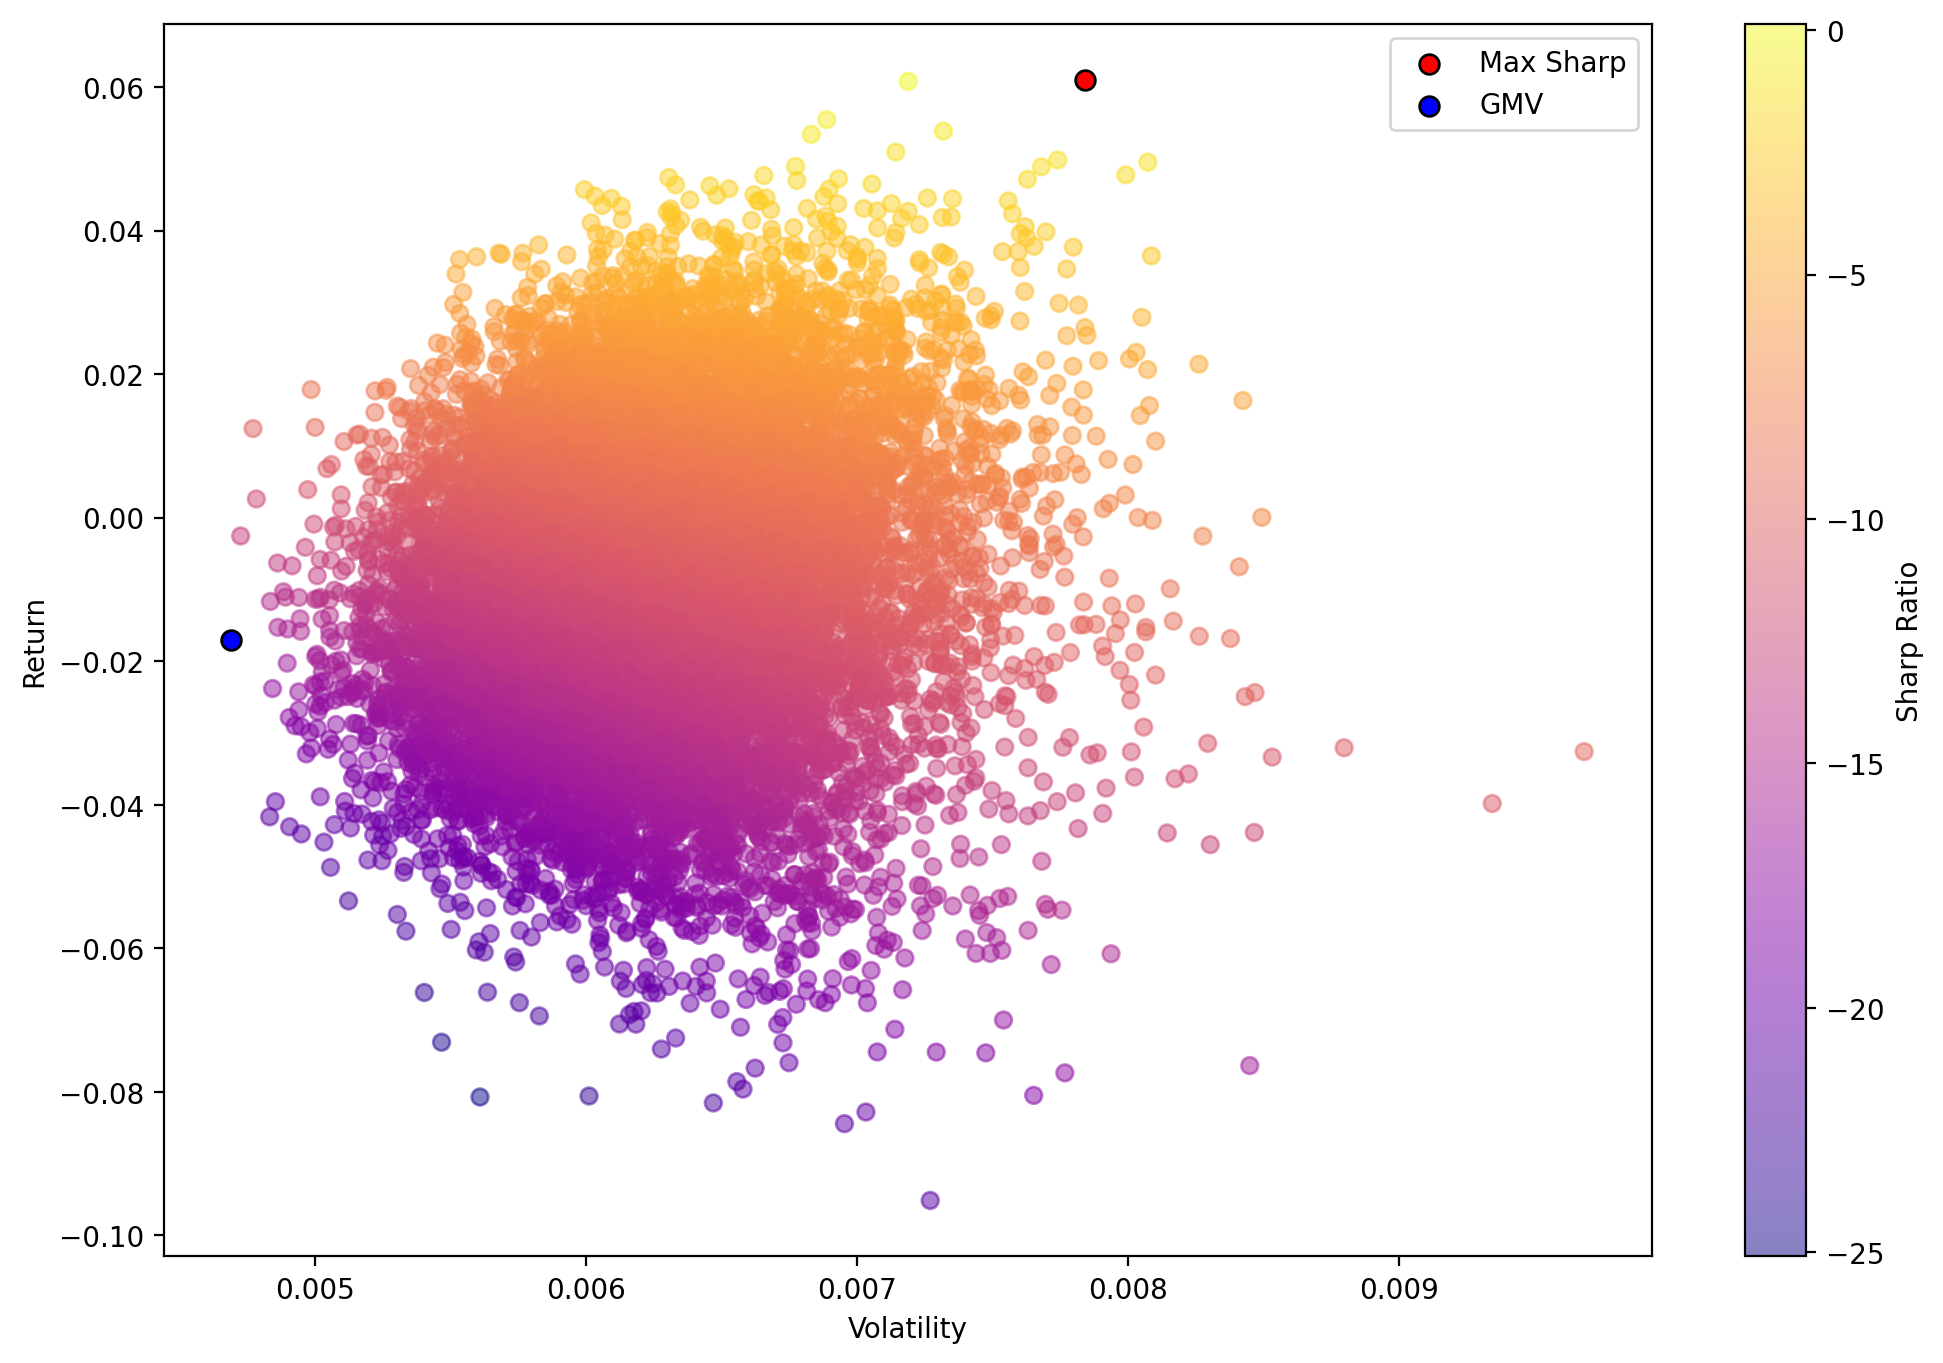

<Figure size 640x480 with 0 Axes>

In [33]:

plt.figure(figsize=(12,8))
plt.scatter(vol_array, ret_array, c=sharp_array, cmap = "plasma", alpha =.5 )
plt.colorbar(label="Sharp Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

# Highlight Max Sharpe Ratio (red) and GMV (green)
plt.scatter(msr_vol, msr_return ,c="red", s=50, edgecolors ="black", label ="Max Sharp")
plt.scatter(GMV_vol, GMV_ret, c="blue", s=50, edgecolors ="black", label ="GMV")
plt.legend()
plt.show()
plt.savefig("my.jpg", dpi= 300)